<a href="https://colab.research.google.com/github/sahokk/AI-app/blob/main/face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## データ前処理

In [ ]:
import glob
import numpy as np
import os
import cv2
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
female_data = '/content/drive/MyDrive/AI-app/img_data/female'

In [ ]:
expression = ['afraid', 'angry', 'disgusted', 'happy', 'neutral', 'sad', 'surprised']
angle = ['full_left', 'half_left', 'straight', 'half_right', 'full_right']
female_pic_dir = '/content/drive/MyDrive/AI-app/KDEF_and_AKDEF/KDEF/AF*/AF*'
female_pic_names = glob.glob(female_pic_dir)
IMG_SIZE = 64
female_training_data = []

In [ ]:
female_pic_names

['/content/drive/MyDrive/AI-app/KDEF_and_AKDEF/KDEF/AF01/AF01AFFR.JPG',
 '/content/drive/MyDrive/AI-app/KDEF_and_AKDEF/KDEF/AF01/AF01AFFL.JPG',
 '/content/drive/MyDrive/AI-app/KDEF_and_AKDEF/KDEF/AF01/AF01SUS.JPG',
 '/content/drive/MyDrive/AI-app/KDEF_and_AKDEF/KDEF/AF01/AF01ANS.JPG',
 '/content/drive/MyDrive/AI-app/KDEF_and_AKDEF/KDEF/AF01/AF01HAHL.JPG',
 '/content/drive/MyDrive/AI-app/KDEF_and_AKDEF/KDEF/AF01/AF01ANFL.JPG',
 '/content/drive/MyDrive/AI-app/KDEF_and_AKDEF/KDEF/AF01/AF01SUHL.JPG',
 '/content/drive/MyDrive/AI-app/KDEF_and_AKDEF/KDEF/AF01/AF01HAFL.JPG',
 '/content/drive/MyDrive/AI-app/KDEF_and_AKDEF/KDEF/AF01/AF01HAHR.JPG',
 '/content/drive/MyDrive/AI-app/KDEF_and_AKDEF/KDEF/AF01/AF01SAHL.JPG',
 '/content/drive/MyDrive/AI-app/KDEF_and_AKDEF/KDEF/AF01/AF01SUFR.JPG',
 '/content/drive/MyDrive/AI-app/KDEF_and_AKDEF/KDEF/AF01/AF01ANFR.JPG',
 '/content/drive/MyDrive/AI-app/KDEF_and_AKDEF/KDEF/AF01/AF01ANHL.JPG',
 '/content/drive/MyDrive/AI-app/KDEF_and_AKDEF/KDEF/AF01/AF01DIHR.

In [ ]:
#バラバラになっている画像データを、感情ごとのフォルダに分けて保存していく

def create_female_data():
  num = 0
  for img_name in female_pic_names:
    basename = os.path.basename(img_name)
    if basename[4:6] == 'AF':
      img = cv2.imread(img_name)
      cv2.imwrite('/content/drive/MyDrive/AI-app/img_data/female/afraid'+'/female_afraid_'+str(num)+'.JPG', img)
    elif basename[4:6] == 'AN':
      img = cv2.imread(img_name)
      cv2.imwrite('/content/drive/MyDrive/AI-app/img_data/female/angry'+'/female_angry_'+str(num)+'.JPG', img)
    elif basename[4:6] == 'DI':
      img = cv2.imread(img_name)
      cv2.imwrite('/content/drive/MyDrive/AI-app/img_data/female/disgusted'+'/female_disgusted_'+str(num)+'.JPG', img)
    elif basename[4:6] == 'HA':
      img = cv2.imread(img_name)
      cv2.imwrite('/content/drive/MyDrive/AI-app/img_data/female/happy'+'/female_happy_'+str(num)+'.JPG', img)
    elif basename[4:6] == 'NE':
      img = cv2.imread(img_name)
      cv2.imwrite('/content/drive/MyDrive/AI-app/img_data/female/neutral'+'/female_neutral_'+str(num)+'.JPG', img)
    elif basename[4:6] == 'SA':
      img = cv2.imread(img_name)
      cv2.imwrite('/content/drive/MyDrive/AI-app/img_data/female/sad'+'/female_sad_'+str(num)+'.JPG', img)
    else:
      img = cv2.imread(img_name)
      cv2.imwrite('/content/drive/MyDrive/AI-app/img_data/female/surprised'+'/female_surprised_'+str(num)+'.JPG', img)

    num = num+1


In [ ]:
# create_female_data()

In [ ]:
def create_female_training_data():
  for class_num, category in enumerate(expression):
    path = os.path.join('/content/drive/MyDrive/AI-app/img_data/female', category)
    for image_name in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, image_name), cv2.IMREAD_GRAYSCALE)  # 画像読み込み
        img_resize_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # 画像のリサイズ
        female_training_data.append([img_resize_array, class_num])  # 画像データ、ラベル情報を追加
      except Exception as e:
        pass

In [ ]:
create_female_training_data()

学習データのラベル： 6
学習データのラベル： 5
学習データのラベル： 4
学習データのラベル： 6


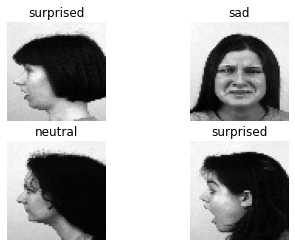

In [ ]:
import random
random.shuffle(female_training_data)

X_female_train = []
y_female_train = []

for feature, label in female_training_data:
  X_female_train.append(feature)
  y_female_train.append(label)

X_female_train = np.array(X_female_train)
y_female_train = np.array(y_female_train)

import matplotlib.pyplot as plt

for i in range(0, 4):
  print("学習データのラベル：", y_female_train[i])
  plt.subplot(2, 2, i+1)
  plt.axis('off')
  if y_female_train[i] == 0:
    label = 'afraid'
  elif y_female_train[i] == 1:
    label = 'angry'
  elif y_female_train[i] == 2:
    label = 'disgusted'
  elif y_female_train[i] == 3:
    label = 'happy'
  elif y_female_train[i] == 4:
    label = 'neutral'
  elif y_female_train[i] == 5:
    label = 'sad'
  else:
    label = 'surprised'
  plt.title(label = label)
  plt.imshow(X_female_train[i], cmap='gray')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from sklearn.model_selection import train_test_split

X_female_train, X_female_test, y_female_train, y_female_test = train_test_split(X_female_train, y_female_train, test_size=0.3, random_state=100, stratify=y_female_train)

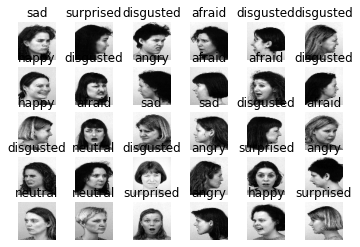

In [ ]:
for i in range(0, 30):
  plt.subplot(5, 6, i+1)
  plt.axis('off')
  if y_female_train[i] == 0:
    label = 'afraid'
  elif y_female_train[i] == 1:
    label = 'angry'
  elif y_female_train[i] == 2:
    label = 'disgusted'
  elif y_female_train[i] == 3:
    label = 'happy'
  elif y_female_train[i] == 4:
    label = 'neutral'
  elif y_female_train[i] == 5:
    label = 'sad'
  else:
    label = 'surprised'
  plt.title(label = label)
  plt.imshow(X_female_train[i], cmap='gray')
plt.show()


In [ ]:
X_female_train = X_female_train.astype('float32') / 255
X_female_test = X_female_test.astype('float32') / 255

In [ ]:
from tensorflow.keras import utils as np_utils
y_test_org = y_female_test
y_female_train = np_utils.to_categorical(y_female_train, len(expression))
y_female_test = np_utils.to_categorical(y_female_test, len(expression))
y_female_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
X_female_train.size

3510272

In [ ]:
X_female_test.size

1507328

## モデル

In [ ]:
import tensorflow as tf
from keras import layers, models
tf.keras.backend.clear_session()
tf.random.set_seed(123)
np.random.seed(35)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Conv2D(32, (3, 3), padding='same'),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.5),


  tf.keras.layers.Conv2D(64, (3, 3), padding='same'),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Conv2D(64, (3, 3), padding='same'),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.5),

  tf.keras.layers.Flatten(),

  tf.keras.layers.Dense(512),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(len(expression)),
  tf.keras.layers.Activation('softmax')
])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 activation (Activation)     (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                        

In [ ]:
# modelのコンパイル
model.compile(loss="categorical_crossentropy",optimizer="Adam",metrics=["acc"])  #adam optimizer
     

In [ ]:
from keras.callbacks import EarlyStopping

callbacks_list = [
                  EarlyStopping(monitor='val_loss', min_delta=0.0, patience=5)
                  ]

In [ ]:
#学習
%%time
history = model.fit(X_female_train, y_female_train, epochs=50, batch_size=50, validation_data=(X_female_test, y_female_test), verbose=1, callbacks=callbacks_list)


Epoch 1/50
35/35 [==============================] - 43s 1s/step - loss: 1.9461 - acc: 0.1644 - val_loss: 1.9453 - val_acc: 0.1714
Epoch 2/50
35/35 [==============================] - 37s 1s/step - loss: 1.9444 - acc: 0.1563 - val_loss: 1.9346 - val_acc: 0.1810
Epoch 3/50
35/35 [==============================] - 37s 1s/step - loss: 1.9072 - acc: 0.2023 - val_loss: 1.8816 - val_acc: 0.2163
Epoch 4/50
35/35 [==============================] - 36s 1s/step - loss: 1.8136 - acc: 0.2869 - val_loss: 1.6899 - val_acc: 0.3510
Epoch 5/50
35/35 [==============================] - 40s 1s/step - loss: 1.6114 - acc: 0.3685 - val_loss: 1.4771 - val_acc: 0.4354
Epoch 6/50
35/35 [==============================] - 36s 1s/step - loss: 1.4866 - acc: 0.4245 - val_loss: 1.3450 - val_acc: 0.4980
Epoch 7/50
35/35 [==============================] - 36s 1s/step - loss: 1.3685 - acc: 0.4706 - val_loss: 1.2661 - val_acc: 0.5320
Epoch 8/50
35/35 [==============================] - 36s 1s/step - loss: 1.2880 - acc: 0.50

23/23 [==============================] - 3s 147ms/step - loss: 0.5948 - acc: 0.8367
正解率= 0.8367347121238708 loss= 0.5947657823562622


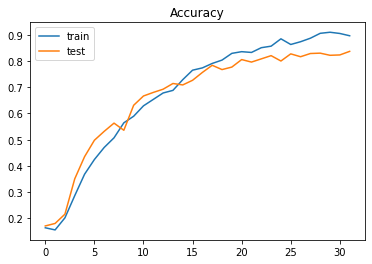

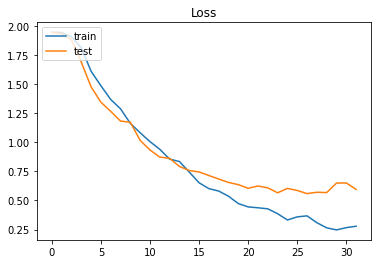

In [ ]:
import matplotlib.pyplot as plt

# モデルを評価
score = model.evaluate(X_female_test, y_female_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画 --- (*5)
# 正解率の推移をプロット
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
pred = model.predict(X_X_female_testtest) # modelは学習させたもの
correct_count = [0] * len(expression)
count = [0] * len(expression)

for i in range(pred.shape[0]):
    prediction = np.argmax(pred[i]) # モデルの予測ラベル取得
    answer = y_test_org[i]
#    print("i,answer=",i,answer)
    count[answer] += 1
    if prediction == answer:
        correct_count[answer] += 1 # 正解数カウント

accuracy = [correct/N for correct, N in zip(correct_count, count)] # 精度算出

for label, acc in enumerate(accuracy):
    print('accuracy for label {} : {}'.format(label, acc))

## リアルタイム